In [42]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Missing Values

In [2]:
#flights = pd.read_csv("d:/flights.csv")
flights =  pd.read_csv("flights.csv")
flights.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      1    1     517.0        2.0     830.0       11.0      UA  N14228   
1  2013      1    1     533.0        4.0     850.0       20.0      UA  N24211   
2  2013      1    1     542.0        2.0     923.0       33.0      AA  N619AA   
3  2013      1    1     554.0       -6.0     812.0      -25.0      DL  N668DN   
4  2013      1    1     554.0       -4.0     740.0       12.0      UA  N39463   

   flight origin dest  air_time  distance  hour  minute  
0    1545    EWR  IAH     227.0      1400   5.0    17.0  
1    1714    LGA  IAH     227.0      1416   5.0    33.0  
2    1141    JFK  MIA     160.0      1089   5.0    42.0  
3     461    LGA  ATL     116.0       762   5.0    54.0  
4    1696    EWR  ORD     150.0       719   5.0    54.0

In [4]:
# เลือกข้อมูลที่มี missing value (use isnull()) อย่างน้อย 1 ตัว (use .any(axis=1)) ในแต่ละแถว 
# df[df.method()]
flights[flights.isnull().any(axis=1)]


year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
330     2013      1    1    1807.0       29.0    2251.0        NaN      UA   
403     2013      1    1       NaN        NaN       NaN        NaN      AA   
404     2013      1    1       NaN        NaN       NaN        NaN      AA   
855     2013      1    2    2145.0       16.0       NaN        NaN      UA   
858     2013      1    2       NaN        NaN       NaN        NaN      AA   
...      ...    ...  ...       ...        ...       ...        ...     ...   
159681  2013      9   28    1214.0      -11.0    1801.0        NaN      AA   
159854  2013      9   28       NaN        NaN       NaN        NaN      AA   
159855  2013      9   28       NaN        NaN       NaN        NaN      US   
160185  2013      9   29    1734.0       23.0    2159.0        NaN      UA   
160286  2013      9   29       NaN        NaN       NaN        NaN      UA   

       tailnum  flight origin dest  air_time  distance  hour  minute  
330     N31412    1228    EWR  SAN       NaN      2425  18.0     7.0  
403     N3EHAA     791    LGA  DFW       NaN      1389   NaN     NaN  
404     N3EVAA    1925    LGA  MIA       NaN      1096   NaN     NaN  
855     N12221    1299    EWR  RSW       NaN      1068  21.0    45.0  
858        NaN     133    JFK  LAX       NaN      2475   NaN     NaN  
...        ...     ...    ...  ...       ...       ...   ...     ...  
159681  N488AA     300    EWR  DFW       NaN      1372  12.0    14.0  
159854  N320AA       1    JFK  LAX       NaN      2475   NaN     NaN  
159855     NaN     581    EWR  CLT       NaN       529   NaN     NaN  
160185  N463UA     327    EWR  PDX       NaN      2434  17.0    34.0  
160286     NaN     331    LGA  ORD       NaN       733   NaN     NaN  

[2827 rows x 16 columns]

In [5]:
# เลือก arr_delay ที่มีค่า missing value
flights1 = flights[flights['arr_delay'].isnull()]
flights1.head()

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier  \
330  2013      1    1    1807.0       29.0    2251.0        NaN      UA   
403  2013      1    1       NaN        NaN       NaN        NaN      AA   
404  2013      1    1       NaN        NaN       NaN        NaN      AA   
855  2013      1    2    2145.0       16.0       NaN        NaN      UA   
858  2013      1    2       NaN        NaN       NaN        NaN      AA   

    tailnum  flight origin dest  air_time  distance  hour  minute  
330  N31412    1228    EWR  SAN       NaN      2425  18.0     7.0  
403  N3EHAA     791    LGA  DFW       NaN      1389   NaN     NaN  
404  N3EVAA    1925    LGA  MIA       NaN      1096   NaN     NaN  
855  N12221    1299    EWR  RSW       NaN      1068  21.0    45.0  
858     NaN     133    JFK  LAX       NaN      2475   NaN     NaN

In [6]:
# เลือกข้อมูลทั้งหมดที่ไม่มี missing value (use dropna())
flights2_nomissing = flights.dropna()
flights2_nomissing.head(10)

year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      1    1     517.0        2.0     830.0       11.0      UA  N14228   
1  2013      1    1     533.0        4.0     850.0       20.0      UA  N24211   
2  2013      1    1     542.0        2.0     923.0       33.0      AA  N619AA   
3  2013      1    1     554.0       -6.0     812.0      -25.0      DL  N668DN   
4  2013      1    1     554.0       -4.0     740.0       12.0      UA  N39463   
5  2013      1    1     558.0       -2.0     753.0        8.0      AA  N3ALAA   
6  2013      1    1     558.0       -2.0     924.0        7.0      UA  N29129   
7  2013      1    1     558.0       -2.0     923.0      -14.0      UA  N53441   
8  2013      1    1     559.0       -1.0     941.0       31.0      AA  N3DUAA   
9  2013      1    1     559.0       -1.0     854.0       -8.0      UA  N76515   

   flight origin dest  air_time  distance  hour  minute  
0    1545    EWR  IAH     227.0      1400   5.0    17.0  
1    1714    LGA  IAH     227.0      1416   5.0    33.0  
2    1141    JFK  MIA     160.0      1089   5.0    42.0  
3     461    LGA  ATL     116.0       762   5.0    54.0  
4    1696    EWR  ORD     150.0       719   5.0    54.0  
5     301    LGA  ORD     138.0       733   5.0    58.0  
6     194    JFK  LAX     345.0      2475   5.0    58.0  
7    1124    EWR  SFO     361.0      2565   5.0    58.0  
8     707    LGA  DFW     257.0      1389   5.0    59.0  
9    1187    EWR  LAS     337.0      2227   5.0    59.0

In [10]:
# เปลี่ยนค่า missing values ของ dep_delay ด้วยค่าศูนย์ (use fillna(value))
nomiss = flights[['dep_delay']].fillna(0)

# nomiss
# ตรวจสอบว่า nomiss เป็น null หรือไม่ (use isnull()) จะให้ค่า True or False (any()) ถ้าเป็น null จะมีค่าเป็น true

nomiss.isnull().any()


dep_delay    False
dtype: bool

In [18]:
# เปลี่ยนค่า missing values  (use fillna(value) )ของ dep_delay 
# ด้วยค่าเฉลี่ยของ dep_delay
#หรือจะใช้คำสั่ง mean_dep_delay = np.mean(flights['dep_delay'])

mean_dep_delay = flights['dep_delay'].mean()

print("ค่าเฉลี่ยของ dep_delay",mean_dep_delay)

average_nomiss = flights[['dep_delay']].fillna(mean_dep_delay)

ค่าเฉลี่ยของ dep_delay 9.46377305609211


In [20]:
average_nomiss

dep_delay
0             2.0
1             4.0
2             2.0
3            -6.0
4            -4.0
...           ...
160749       -1.0
160750       21.0
160751        0.0
160752       -7.0
160753       80.0

[160754 rows x 1 columns]

In [22]:
# นับจำนวน missing values (use sum()) ที่อยู่ในแต่ละ dep_delay, arr_delay attribute

flights[['dep_delay', 'arr_delay']].isnull().sum().sum()

5163

In [ ]:
#นับจำนวน missing value ของ dep_delay และ arr_delay ทั้งหมด

# your code

---
### Common Aggregation Functions:

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|count   | number of non-null observations
|sum   | sum of values
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|prod   | product of values
|std  | standard deviation
|var | unbiased variance



In [23]:
# Find the number of non-missing values in each column
# นับจำนวนที่ไม่ใช่ missing value ของแต่ละ attribute

flights.count()

year         160754
month        160754
day          160754
dep_time     158418
dep_delay    158418
arr_time     158275
arr_delay    157927
carrier      160754
tailnum      159321
flight       160754
origin       160754
dest         160754
air_time     157927
distance     160754
hour         158418
minute       158418
dtype: int64

In [24]:
# Find minimum value for all the columns in the dataset

flights.min()

C:\Users\kaews\AppData\Local\Temp\ipykernel_7224\1786203888.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flights.min()


year         2013
month           1
day             1
dep_time      1.0
dep_delay   -33.0
arr_time      1.0
arr_delay   -75.0
carrier        AA
flight          1
origin        EWR
dest          ANC
air_time     21.0
distance       17
hour          0.0
minute        0.0
dtype: object

In [ ]:
#หาค่าเฉลี่ยของ (use .mean()) dep_delay แยกตามกลุ่ม carrier (use groupby())

# your code

In [25]:
#ใช้ agg() method เพื่อหา min, max, mean  ของ dep_delay,arr_delay

flights[['dep_delay','arr_delay']].agg(['min', 'max', 'mean'])

dep_delay    arr_delay
min    -33.000000   -75.000000
max   1014.000000  1007.000000
mean     9.463773     2.094537

### Basic descriptive statistics

|Function|Description
|-------|--------
|min   | minimum
|max   | maximum
|mean  | arithmetic mean of values
|median | median
|mad | mean absolute deviation
|mode | mode
|std  | standard deviation
|var | unbiased variance
|sem | standard error of the mean
|skew| sample skewness
|kurt|kurtosis
|quantile| value at %


In [26]:
# คำนวณหาค่าสถิติพื้นฐานของ dep_delay (use describe())

flights.describe()

year          month            day       dep_time      dep_delay  \
count  160754.0  160754.000000  160754.000000  158418.000000  158418.000000   
mean     2013.0       6.547395      15.716567    1316.146006       9.463773   
std         0.0       3.410001       8.762794     470.823715      36.545109   
min      2013.0       1.000000       1.000000       1.000000     -33.000000   
25%      2013.0       4.000000       8.000000     855.000000      -5.000000   
50%      2013.0       7.000000      16.000000    1345.000000      -2.000000   
75%      2013.0      10.000000      23.000000    1725.000000       7.000000   
max      2013.0      12.000000      31.000000    2400.000000    1014.000000   

            arr_time      arr_delay         flight       air_time  \
count  158275.000000  157927.000000  160754.000000  157927.000000   
mean     1517.471161       2.094537    1156.344987     180.685158   
std       510.695413      41.479349     695.884283      97.507866   
min         1.000000     -75.000000       1.000000      21.000000   
25%      1112.000000     -19.000000     504.000000     111.000000   
50%      1541.000000      -7.000000    1157.000000     153.000000   
75%      1944.000000       9.000000    1715.000000     258.000000   
max      2400.000000    1007.000000    2599.000000     695.000000   

            distance           hour         minute  
count  160754.000000  158418.000000  158418.000000  
mean     1282.445420      12.837582      32.387847  
std       765.895383       4.725552      18.687423  
min        17.000000       0.000000       0.000000  
25%       733.000000       8.000000      16.000000  
50%      1076.000000      13.000000      32.000000  
75%      1728.000000      17.000000      51.000000  
max      4963.000000      24.000000      59.000000

In [28]:
# Count the number of records for each different value in a vector
#เหมือน flights.groupby('carrier')['carrier'].count()  (use value_counts() )

flights[['carrier']].value_counts()

carrier
UA         58665
DL         48110
AA         32729
US         20536
AS           714
dtype: int64

In [30]:
# use count()
flights['carrier'].count()

160754

### Explore data using graphics

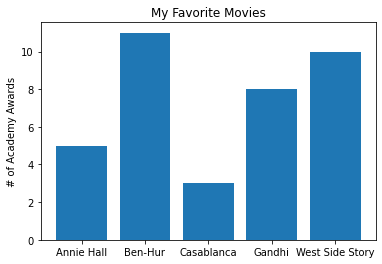

In [35]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

xs = range(len(movies)) # xs is range(5)

# plot bars with left x-coordinates [xs], # heights [num_oscars]
# plt.bar(range, value, color=('r','g','b','r','b'))
# plt.bar(range, value)
plt.bar(xs,num_oscars)

# label x-axis with movie names at bar centers
# plt.xticks(range, value)
plt.xticks(xs,movies)

# alternatively, use the following to replace # the two lines above
#plt.bar(xs, num_oscars, tick_label=movies)


plt.ylabel("# of Academy Awards")
plt.title("My Favorite Movies")
plt.show()

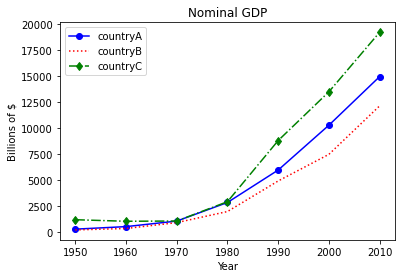

In [41]:
years = list(range(1950, 2011, 10))
gdp1 = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]
gdp2 = [226.0, 362.0, 928.0, 1992.0, 4931.0, 7488.0, 12147.0]
gdp3 = [1206.0, 1057.0, 1081.0, 2940.0, 8813.0, 13502.0, 19218.0]

# create a line chart, years on x-axis, gdp on y-axis
# use format string to specify color, marker, and line style
# e.g. ‘bo-’: color=‘blue’, marker=‘o’, linestyle=‘solid’
plt.plot(years, gdp1, "bo-", years, gdp2, "r:", years, gdp3, "gd-.")
         
# add a title "Nominal GDP"
# plt.title(...)
plt.title('Nominal GDP')
         
# add a label "Billions of $" to the y-axis
plt.ylabel("Billions of $")
         
# add a label "Year" to the x-axis
plt.xlabel("Year")
         
# add legend "countryA", "countryB", "countryC"
plt.legend(["countryA", "countryB", "countryC"])
plt.show()

D:\Users\kaews\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


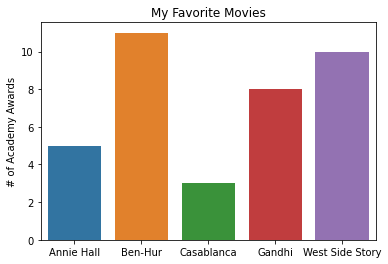

In [44]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

#sns.barplot(range, value,palette=('r','g','b','r','b')).set(ylabel = "# of Academy Awards", title ='My Favorite Movies')
# or
#sns.barplot(range, value).set(ylabel = "# of Academy Awards", title ='My Favorite Movies')
sns.barplot(movies,num_oscars).set(ylabel = "# of Academy Awards",title ='My Favorite Movies')
# your code

plt.show()

In [45]:
df = pd.read_csv("Salaries.csv")
df.head()

rank discipline  phd  service   sex  salary
0  Prof          B   56       49  Male  186960
1  Prof          A   12        6  Male   93000
2  Prof          A   23       20  Male  110515
3  Prof          A   40       31  Male  131205
4  Prof          B   20       18  Male  104800

In [46]:
#Show graphs withint Python notebook
%matplotlib inline

(array([ 9., 11., 22., 11., 12.,  8.,  4.,  1.]),
 array([ 57800.,  73945.,  90090., 106235., 122380., 138525., 154670.,
        170815., 186960.]),
 <BarContainer object of 8 artists>)

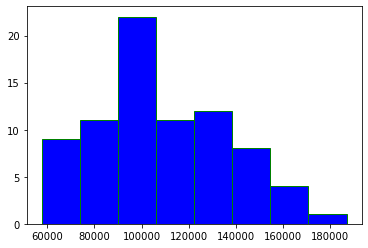

In [52]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['salary'],bins=8, color = 'blue', edgecolor = 'green')


<AxesSubplot:ylabel='salary'>

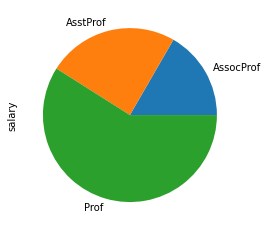

In [53]:
# ใช้ dataframe เพื่อ plot pieplot rank,salary
# dataframe.groupby(['col'])['col'].count().plot(kind='pie')

df.groupby(['rank'])['salary'].count().plot(kind='pie')

([<matplotlib.patches.Wedge at 0x1bd411f7f70>,
 [Text(0.9526279355804298, 0.5500000148652441, 'AssocProf'),
  Text(-0.26324726533057186, 1.0680359906370083, 'AsstProf'),
  Text(-0.3060390936294321, -1.0565699565908904, 'Prof')])

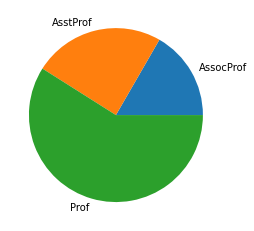

In [55]:
#การ plot pie graph โดยใช้ matplot 
# 1. dataframe.groupby(['col'])['col'].count() แบ่งกลุ่มและนับข้อมูล
# 2. plt.pie(value จากข้อ 1, labels=value จากข้อ 1.index)

rank_salary = df.groupby(['rank'])['salary'].count()
plt.pie(rank_salary,labels=rank_salary.index)

<AxesSubplot:xlabel='rank'>

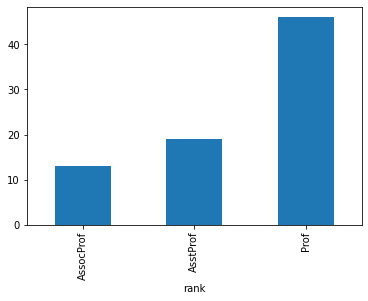

In [56]:
# ใช้ dataframe เพื่อ plot bar rank,salary
# dataframe.groupby(['col'])['col'].count().plot(kind='bar')

df.groupby(['rank'])['salary'].count().plot(kind='bar')

<AxesSubplot:ylabel='salary'>

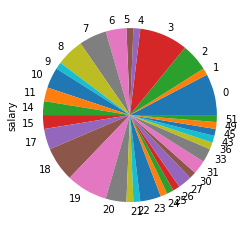

In [57]:
# ใช้ dataframe เพื่อ plot pie service,salary
# dataframe.groupby(['col1'])['col2'].count().plot(kind='pie', x='title col1', y='title col2')

df.groupby(['service'])['salary'].count().plot(kind='pie')

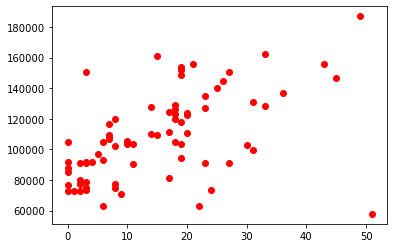

In [58]:
# scatter plot service,salary
# plt.scatter(dataframe['col1'], dataframe['col2'], color = "red")
plt.scatter(df['service'], df['salary'], color = "red")

D:\Users\kaews\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


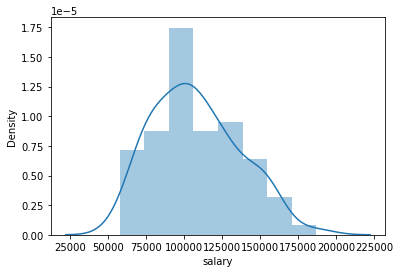

In [59]:
#Use seaborn package to draw a histogram [salary]
sns.distplot(df['salary']);

In [ ]:
# Use regular matplotlib function to display a barplot ['rank','salary']
# dataframe.groupby(['col'])['col'].count().plot(kind='bar')

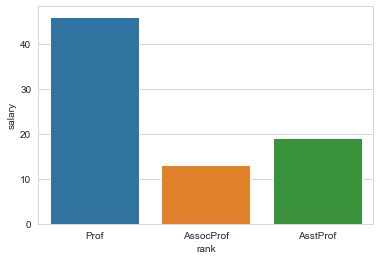

In [60]:
# Use seaborn package to display a barplot 'rank','salary'
sns.set_style("whitegrid")
# ax = sns.barplot(x='col1',y ='col2', data=dataframe, estimator=len)
ax = sns.barplot(x='rank',y='salary',data=df,estimator=len)

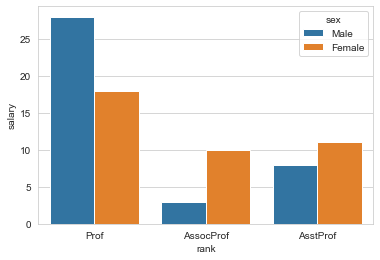

In [62]:
# Split into 2 groups: 'rank','salary','sex'
# ax = sns.barplot(x='col_groups1',y ='col_value', hue='col_groups2',  data=dataframe, estimator=len)
ax = sns.barplot(x='rank',y ='salary', hue='sex',  data=df, estimator=len)

<AxesSubplot:xlabel='service', ylabel='salary'>

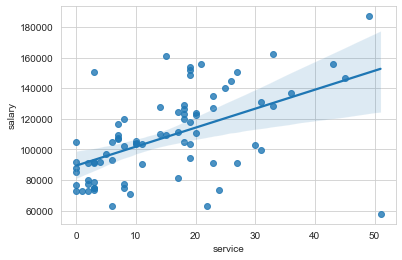

In [65]:
#If we are interested in linear regression plot for 2 numeric variables we can use regplot
# service,salary
sns.regplot(x='service', y='salary', data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

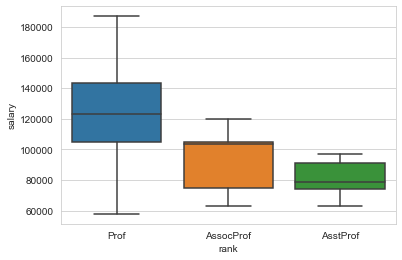

In [66]:
# box plot 'rank','salary'
# sns.boxplot(x='col1',y='col2', data=df)
sns.boxplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

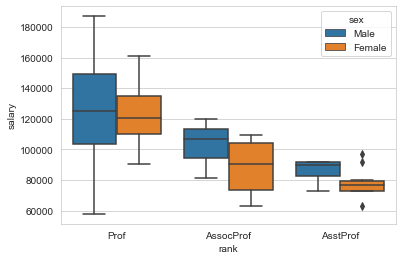

In [67]:
# side-by-side box plot 'rank','salary','sex'
# sns.boxplot(x='col1',y='col2', data=dataframe, hue='col3')
sns.boxplot(x='rank',y='salary',data=df,hue='sex')

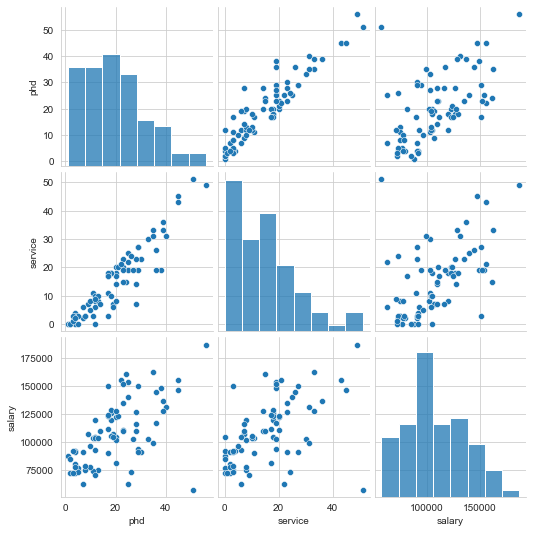

In [68]:
# Pairplot 
sns.pairplot(df)